In [52]:
import sagemaker
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers

print(sagemaker.__version__)
sess = sagemaker.Session()
role = 'species_classifier'
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2.86.0


### Train Outside Laptop

In [2]:
### get the count
import glob
my_path = "../data"
files = glob.glob(my_path + '/**/*.jpg', recursive=True)
len(files)

3670

In [24]:
# Created a directory to save all images at one location
concat_path = '../all_files'
chk_fld = os.path.isdir(concat_path)

if not chk_fld:
  os.mkdir(concat_path)
  print(f'folder created Successfully: {concat_path}')

else:
  print('Folder already present')

folder created Successfully: ../all_files


In [71]:
pt ='../data/daisy/5547758_eea9edfd54_n.jpg'
im_dim = cv2.imread(pt)
cv2.imwrite('D:/flower_classification_al/all_files/img.jpg', im_dim)

True

In [29]:
cnt =1
for m in glob.glob(my_path+'/**/*'):
    im_dim = cv2.imread(m)
    
    # 
    m = m.replace('../data','')
    m = m.replace(os.sep, '/').lstrip('/').replace('.jpg','')
    # print(m)
    f ='D:/flower_classification_al/all_files/{}.jpg'.format(m)
    print(f)
    cv2.imwrite(f, im_dim)
    cnt +=1

D:/flower_classification_al/all_files/daisy/100080576_f52e8ee070_n.jpg
D:/flower_classification_al/all_files/daisy/10140303196_b88d3d6cec.jpg
D:/flower_classification_al/all_files/daisy/10172379554_b296050f82_n.jpg
D:/flower_classification_al/all_files/daisy/10172567486_2748826a8b.jpg
D:/flower_classification_al/all_files/daisy/10172636503_21bededa75_n.jpg
D:/flower_classification_al/all_files/daisy/102841525_bd6628ae3c.jpg
D:/flower_classification_al/all_files/daisy/1031799732_e7f4008c03.jpg
D:/flower_classification_al/all_files/daisy/10391248763_1d16681106_n.jpg
D:/flower_classification_al/all_files/daisy/10437754174_22ec990b77_m.jpg
D:/flower_classification_al/all_files/daisy/10437770546_8bb6f7bdd3_m.jpg
D:/flower_classification_al/all_files/daisy/10437929963_bc13eebe0c.jpg
D:/flower_classification_al/all_files/daisy/10466290366_cc72e33532.jpg
D:/flower_classification_al/all_files/daisy/10466558316_a7198b87e2.jpg
D:/flower_classification_al/all_files/daisy/10555749515_13a12a026e.jpg

In [30]:
# A list of all species/classes
os.listdir(my_path)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [36]:
ls ={}
total_images = 0
for root, dirs, files in os.walk(my_path):
  if root.endswith('../data'):
    pass
  else:
    if root not in ls:
      ls[root] = len(files)
      total_images += len(files)
      #print(len(files),'----',files)


for key,values in ls.items():
    trunc_class = key.replace(os.sep, '/').replace('../data/','')
    print(f'{trunc_class}: {values}')
print(f'\nTotal Images:- {total_images}')

daisy: 633
dandelion: 898
roses: 641
sunflowers: 699
tulips: 799

Total Images:- 3670


In [49]:
cols = ['file_path', 'target']
lst = []
for m in glob.glob(concat_path+'/**/*'):
  class_nm = m.replace(os.sep, '/').replace('../all_files/','').split('/')[0]
  lst.append([m, class_nm])
  
df = pd.DataFrame(lst, columns=cols)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,file_path,target
0,../all_files\daisy\12891819633_e4c82b51e8.jpg,daisy
1,../all_files\daisy\9595857626_979c45e5bf_n.jpg,daisy
2,../all_files\daisy\2578695910_5ab8ee17c1_n.jpg,daisy
3,../all_files\dandelion\2480853696_aacdbb5324.jpg,dandelion
4,../all_files\sunflowers\6908789145_814d448bb1_...,sunflowers
5,../all_files\daisy\10466290366_cc72e33532.jpg,daisy
6,../all_files\roses\3045046293_57f6d52065_m.jpg,roses
7,../all_files\sunflowers\8041242566_752def876e_...,sunflowers
8,../all_files\daisy\20948886919_cac7844f34_n.jpg,daisy
9,../all_files\sunflowers\5967283168_90dd4daf28_...,sunflowers


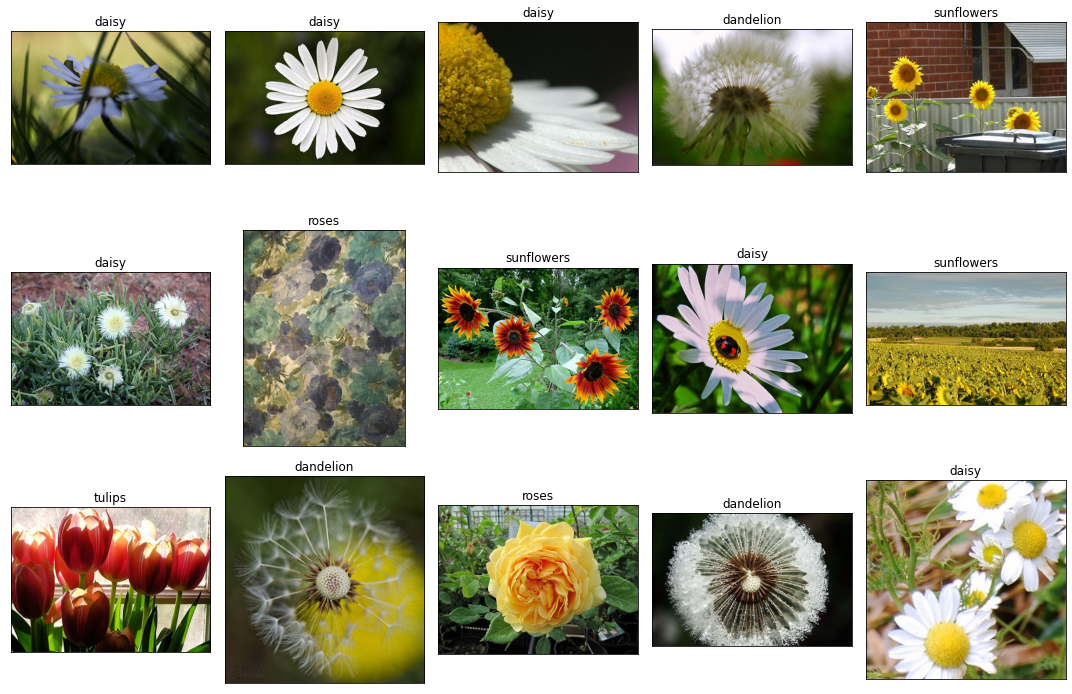

In [51]:
# Display some pictures of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.file_path[i]))
    ax.set_title(df.target[i])

plt.tight_layout()
plt.show()

### Spliting the dataset

In [62]:
# stratify=y creates a balanced validation set.
y = df['target']

df_train, df_val = train_test_split(df, test_size=0.10, random_state=42, stratify=y)

print(df_train.shape)
print(df_val.shape)

(3303, 2)
(367, 2)


In [67]:
def make_class_dir(original_path,data_dir,subfolder):
  for name in os.listdir(original_path):
    os.mkdir(os.path.join(data_dir,subfolder,name))
    print(f'{name} inside {subfolder} is created...')

In [68]:
data_dir = '../data_dir'
chk_fld = os.path.isdir(data_dir)

if not chk_fld:
  os.mkdir(data_dir)
  print(f'created folder: {data_dir}\n')

  for subfolder in ['train_dir', 'val_dir']:
    os.mkdir(os.path.join(data_dir, subfolder))
    print(f'{subfolder} subdirectory created')
    make_class_dir(my_path, data_dir, subfolder)
    
else:
  folder_nm = data_dir.split('/')[-1]
  print(f'{folder_nm} folder already exists')

created folder: ../data_dir

train_dir subdirectory created
daisy inside train_dir is created...
dandelion inside train_dir is created...
roses inside train_dir is created...
sunflowers inside train_dir is created...
tulips inside train_dir is created...
val_dir subdirectory created
daisy inside val_dir is created...
dandelion inside val_dir is created...
roses inside val_dir is created...
sunflowers inside val_dir is created...
tulips inside val_dir is created...


In [71]:
df_train.head()

,file_path,target
2279,../all_files\sunflowers\22203670478_9ec5c2700b...,sunflowers
2629,../all_files\roses\16316557109_7fc55c1cbc_m.jpg,roses
612,../all_files\tulips\13509967925_eaaeefa396_m.jpg,tulips
2570,../all_files\sunflowers\7176729016_d73ff2211e.jpg,sunflowers
2633,../all_files\roses\6069602140_866eecf7c2_m.jpg,roses


In [91]:
def to_load(path, df, img_size=180):
    for index, row in df.iterrows():
        image_name = row['file_path'].replace(os.sep, '/').replace('../all_files/', '').split('/')[1]
        f = '{}/{}/{}'.format(path,row['target'],image_name)
        #resize the image and save it at the new location
        image = cv2.imread(row['file_path'])
        image = cv2.resize(image, (img_size, img_size))
        cv2.imwrite(f, image)
        # print(f)

In [92]:
## Populating training folder
train_pth = 'D:/flower_classification_al/data_dir/train_dir'
to_load(train_pth,df_train)

In [93]:
## Populating validation folder
test_pth = 'D:/flower_classification_al/data_dir/val_dir'
to_load(test_pth,df_val)

In [134]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # val 20%

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.25)

In [135]:
data_dir = '../data'
train_dir = '../data_dir/train_dir'
val_dir = '../data_dir/val_dir'
#Define some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [136]:
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(img_height, img_width), 
                                               color_mode='rgb',
                                               batch_size=batch_size, 
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training') 

val_data = val_datagen.flow_from_directory(val_dir, 
                                           target_size=(img_height, img_width),
                                           color_mode='rgb',
                                           batch_size=batch_size, 
                                           class_mode='categorical',
                                           shuffle=False,
                                           subset = 'validation')

Found 3303 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


In [137]:
number_of_classes = len(train_data.class_indices)

In [138]:
## Number of GPU 
# Number of GPUs on this machine
%env SM_NUM_GPUS=0
# Where to save the model
%env SM_MODEL_DIR=/tmp/model
# Where the training data is
%env SM_CHANNEL_TRAINING='../data_dir/train_dir'
# Where the validation data is
%env SM_CHANNEL_VALIDATION='../data_dir/val_dir'

%env num_classes=5

%env image_height=180
%env image_width=180

env: SM_NUM_GPUS=0
env: SM_MODEL_DIR=/tmp/model
env: SM_CHANNEL_TRAINING='../data_dir/train_dir'
env: SM_CHANNEL_VALIDATION='../data_dir/val_dir'
env: num_classes=5
env: image_height=180
env: image_width=180


In [139]:
import argparse, os
parser = argparse.ArgumentParser()

parser.add_argument('--gpu-count', type=int, default=os.environ['SM_NUM_GPUS'])
parser.add_argument('--model-dir', type=str, default=os.environ['SM_MODEL_DIR'])
parser.add_argument('--training', type=str, default=os.environ['SM_CHANNEL_TRAINING'])
parser.add_argument('--validation', type=str, default=os.environ['SM_CHANNEL_VALIDATION'])

parser.add_argument('--num_classes', type=str, default=os.environ['num_classes'])
parser.add_argument('--image_height', type=str, default=os.environ['image_height'])
parser.add_argument('--image_width', type=str, default=os.environ['image_width'])

args, _ = parser.parse_known_args()

gpu_count  = args.gpu_count
model_dir  = args.model_dir
training_dir   = args.training
validation_dir = args.validation
num_classes = args.num_classes
img_height = args.image_height
img_width = args.image_width 

In [140]:
print(training_dir)

'../data_dir/train_dir'


In [144]:
class multiclassifier(tf.keras.Model):
    def __init__(self, num_classes, img_height, img_width):
        super(multiclassifier, self).__init__()
        # define all layers in init
        
        # data augment
        self.rndmflip = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3))
        self.rndmrotate = tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)
        self.rndmzoom = tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
        # self.rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))
        # Layer of block 1
        self.conv1 = tf.keras.layers.Conv2D(16, 3, padding='same', activation="relu")
        self.max1 = tf.keras.layers.MaxPooling2D()
        
        # Layer of block 2
        self.conv2 = tf.keras.layers.Conv2D(32, 3, padding='same', activation="relu")
        self.max2 = tf.keras.layers.MaxPooling2D()

        # Layer for block3
        self.conv3 = tf.keras.layers.Conv2D(64, 3, padding='same', activation="relu")
        self.max3 = tf.keras.layers.MaxPooling2D()
    
        # Flattening, followed by classifier
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense = tf.keras.layers.Dense(num_classes)

    def call(self, input_tensor, training=False):
        # Data Augmentation
        x = self.rndmflip(input_tensor)
        x = self.rndmflip(x)
        x = self.rndmzoom(x)
        # x= self.rescale(x)
        # forward pass: block 1 
        x = self.conv1(x)
        x = self.max1(x)

        # forward pass: block 2 
        x = self.conv2(x)
        x = self.max2(x)

        # forward pass: block 3 
        x = self.conv3(x)
        x = self.max3(x)

        # Flattening, followed by classifier
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense(x)

In [145]:
# compile 
print('\nModel Sub-Classing API')
sub_class_model = multiclassifier(num_classes, img_height, img_width)
sub_class_model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


Model Sub-Classing API


In [146]:
sub_class_model.build([None,180,180,3])

In [147]:
sub_class_model.summary()

Model: "multiclassifier_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_4 (RandomFlip)   multiple                  0         
_________________________________________________________________
random_rotation_4 (RandomRot multiple                  0 (unused)
_________________________________________________________________
random_zoom_4 (RandomZoom)   multiple                  0         
_________________________________________________________________
conv2d_12 (Conv2D)           multiple                  448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_13 (Conv2D)           multiple                  4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling multiple            

In [148]:
# fit
epochs=10
history = sub_class_model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
104/104 [==============================] - 63s 499ms/step - loss: 10.0312 - accuracy: 0.1895 - val_loss: 10.3872 - val_accuracy: 0.1889
Epoch 2/10
104/104 [==============================] - 48s 403ms/step - loss: 10.2672 - accuracy: 0.1904 - val_loss: 10.3872 - val_accuracy: 0.1889
Epoch 3/10
104/104 [==============================] - 33s 266ms/step - loss: 10.2672 - accuracy: 0.1904 - val_loss: 10.3872 - val_accuracy: 0.1889
Epoch 4/10
104/104 [==============================] - 21s 151ms/step - loss: 10.2672 - accuracy: 0.1904 - val_loss: 10.3872 - val_accuracy: 0.1889
Epoch 5/10
104/104 [==============================] - 21s 155ms/step - loss: 10.2672 - accuracy: 0.1904 - val_loss: 10.3872 - val_accuracy: 0.1889
Epoch 6/10
104/104 [==============================] - 21s 148ms/step - loss: 10.2672 - accuracy: 0.1904 - val_loss: 10.3872 - val_accuracy: 0.1889
Epoch 7/10
104/104 [==============================] - 22s 165ms/step - loss: 10.2672 - accuracy: 0.1904 - val_loss: 10